# Visualizing Eigenvectors

As we know eigenvectors are those vectors that are only stretched, with no rotation or shear. Thus, I would like to see this in action using python

Reference: https://www.youtube.com/watch?v=mxkGMbrobY0

## Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 8, 8

An intuitive explanation on the linspace function: 

Essentially, linspace is like marking equal intervals along a straight road from one city to another, ensuring each mark is spaced equally from its neighbors, providing a simple and visual way to create linear divisions between two points.

In [4]:
x = np.linspace(-1, 1, 100)
print(x)

[-1.         -0.97979798 -0.95959596 -0.93939394 -0.91919192 -0.8989899
 -0.87878788 -0.85858586 -0.83838384 -0.81818182 -0.7979798  -0.77777778
 -0.75757576 -0.73737374 -0.71717172 -0.6969697  -0.67676768 -0.65656566
 -0.63636364 -0.61616162 -0.5959596  -0.57575758 -0.55555556 -0.53535354
 -0.51515152 -0.49494949 -0.47474747 -0.45454545 -0.43434343 -0.41414141
 -0.39393939 -0.37373737 -0.35353535 -0.33333333 -0.31313131 -0.29292929
 -0.27272727 -0.25252525 -0.23232323 -0.21212121 -0.19191919 -0.17171717
 -0.15151515 -0.13131313 -0.11111111 -0.09090909 -0.07070707 -0.05050505
 -0.03030303 -0.01010101  0.01010101  0.03030303  0.05050505  0.07070707
  0.09090909  0.11111111  0.13131313  0.15151515  0.17171717  0.19191919
  0.21212121  0.23232323  0.25252525  0.27272727  0.29292929  0.31313131
  0.33333333  0.35353535  0.37373737  0.39393939  0.41414141  0.43434343
  0.45454545  0.47474747  0.49494949  0.51515152  0.53535354  0.55555556
  0.57575758  0.5959596   0.61616162  0.63636364  0.

Let's now plot the following equations:

${y_1 = \sqrt{1 - x^2}}$

${y_2 = - y_1}$

In [9]:
y1 = np.sqrt(1 - np.square(x))
print(f"y1: {y1[:5]} ...",)
y2 = -1 * y1
print(f"y2: {y2[:5]} ...",)

y1: [0.         0.1999898  0.28138158 0.34283965 0.39380987] ...
y2: [-0.         -0.1999898  -0.28138158 -0.34283965 -0.39380987] ...


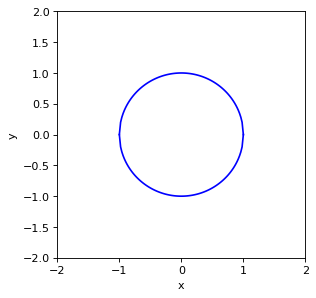

In [34]:
plt.figure(figsize=(4, 4), dpi=80)

# Plotting the circle
plt.plot(x, y1, 'b')  # Plot the first semicircle
plt.plot(x, y2, 'b')  # Plot the second semicircle

# Setting plot limits
plt.xlim([-2, 2])
plt.ylim([-2, 2])

# Setting axis labels
plt.xlabel('x')
plt.ylabel('y')

# Display the plot
plt.show()

Now let's apply a matrix transformation to this circle.

In [19]:
def transformation(x, y):
    return 9*x + 4*y, + 4*x + 3*y

To express the transformation function above in mathematical notation with $a$ as a matrix, you would define it as a function of a vector $ \mathbf{v} $, where $ \mathbf{v} $ is the vector $ \begin{bmatrix} x \\ y \end{bmatrix} $. The matrix $A$ defines the transformation and is applied to $ \mathbf{v} $.

Here's how you can express it:

Let $ \mathbf{v} = \begin{bmatrix} x \\ y \end{bmatrix} $ and let the transformation function $T$ be represented as:

$ T(\mathbf{v}) = A \mathbf{v} $

Where $A$ (the transformation matrix) is:

$ A = \begin{bmatrix} 9 & 4 \\ 4 & 3 \end{bmatrix} $

Thus, the transformation $T$ applied to vector $ \mathbf{v} $ is:

$ T(\begin{bmatrix} x \\ y \end{bmatrix}) = \begin{bmatrix} 9 & 4 \\ 4 & 3 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} 9x + 4y \\ 4x + 3y \end{bmatrix} $

This expresses the transformation function as a matrix multiplication, which is a standard approach in linear algebra for representing linear transformations.

In [21]:
x_new1, y_new1 = transformation(x, y1)
x_new2, y_new2 = transformation(x, y2)

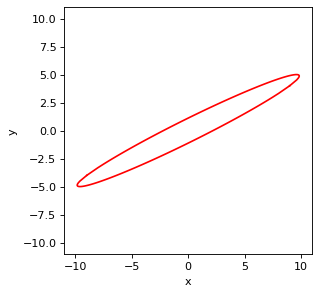

In [36]:
plt.figure(figsize=(4, 4), dpi=80)

# Plotting the circle
plt.plot(x_new1, y_new1, 'r')  # Plot the first semicircle
plt.plot(x_new2, y_new2, 'r')  # Plot the second semicircle

# Setting plot limits
plt.xlim([-11, 11])
plt.ylim([-11, 11])

# Setting axis labels
plt.xlabel('x')
plt.ylabel('y')

# Display the plot
plt.show()

Let's now plot then side by side. 

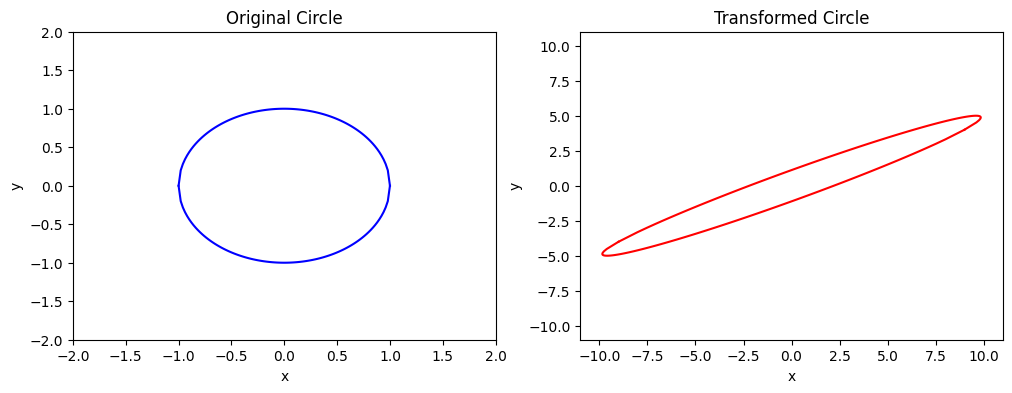

In [76]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plotting the original circle on the first subplot
axs[0].plot(x, y1, 'b')  # Plot the first semicircle
axs[0].plot(x, y2, 'b')  # Plot the second semicircle
axs[0].set_xlim([-2, 2])
axs[0].set_ylim([-2, 2])
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('Original Circle')

# Plotting the transformed circle on the second subplot
axs[1].plot(x_new1, y_new1, 'r')  # Plot the first semicircle
axs[1].plot(x_new2, y_new2, 'r')  # Plot the second semicircle
axs[1].set_xlim([-11, 11])
axs[1].set_ylim([-11, 11])
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_title('Transformed Circle')

# Display the plots
plt.show()

Let's now obtain the eigenvectors so we can better understand this linear transformation.

In [54]:
transformation_matrix = [[9, 4], [4, 3]]
eig_vals, eig_vecs = np.linalg.eig(np.array(transformation_matrix))

print(f'Eigenvalues: {eig_vals}\n')
print(f'Eigenvectors: \n {eig_vecs}')

Eigenvalues: [11.  1.]

Eigenvectors: 
 [[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]


Next, we'll visualize how eigenvectors can only be stretched or rotated. 

In [56]:
eig_vals[0] * eig_vecs[0][0]

9.838699100999074

In [57]:
eigen_trans_0 = np.array(
    [[
        0, 0, 
        eig_vals[0] * eig_vecs[0][0],
        eig_vals[0] * eig_vecs[1][0],
    ]]
)
print(eigen_trans_0)

eigen_trans_1 = np.array(
    [[
        0, 0, 
        eig_vals[1] * eig_vecs[0][1],
        eig_vals[1] * eig_vecs[1][1],
    ]]
)
print(eigen_trans_1)

[[0.         0.         9.8386991  4.91934955]]
[[ 0.          0.         -0.4472136   0.89442719]]


In [59]:
X_0, Y_0, U_0, V_0 = zip(*eigen_trans_0)
X_1, Y_1, U_1, V_1 = zip(*eigen_trans_1)
print(f"X0: {X_0} | X1: {X_1}")
print(f"Y0: {Y_0} | Y1: {Y_1}")
print(f"U0: {U_0} | U1: {U_1}")
print(f"V0: {V_0} | V1: {V_1}")

X0: (0.0,) | X1: (0.0,)
Y0: (0.0,) | Y1: (0.0,)
U0: (9.838699100999074,) | U1: (-0.4472135954999579,)
V0: (4.919349550499537,) | V1: (0.8944271909999159,)


Look how the eigevectors will remain the same after the linear transformation.

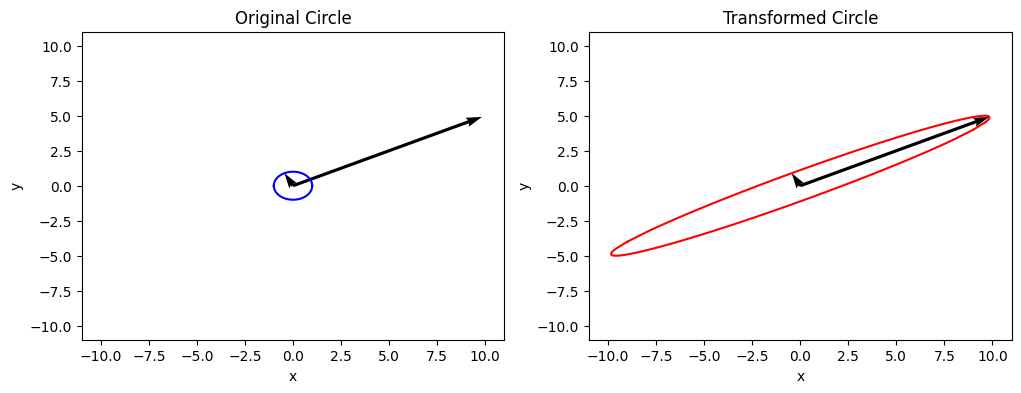

In [75]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plotting the original circle on the first subplot
axs[0].plot(x, y1, 'b')  # Plot the first semicircle
axs[0].plot(x, y2, 'b')  # Plot the second semicircle
axs[0].quiver(X_0, Y_0, U_0, V_0, angles="xy", scale_units="xy", scale=1)
axs[0].quiver(X_1, Y_1, U_1, V_1, angles="xy", scale_units="xy", scale=1)
axs[0].set_xlim([-11, 11])
axs[0].set_ylim([-11, 11])
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('Original Circle')

# Plotting the transformed circle on the second subplot
axs[1].plot(x_new1, y_new1, 'r')  # Plot the first semicircle
axs[1].plot(x_new2, y_new2, 'r')  # Plot the second semicircle
axs[1].quiver(X_0, Y_0, U_0, V_0, angles="xy", scale_units="xy", scale=1)
axs[1].quiver(X_1, Y_1, U_1, V_1, angles="xy", scale_units="xy", scale=1)
axs[1].set_xlim([-11, 11])
axs[1].set_ylim([-11, 11])
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_title('Transformed Circle')

# Display the plots
plt.show()